# UTKFaces - CV Project

Team name: / Team members: Angelika Führer, if20b090@technikum-wien.at Chiara Babiak, if20b061@technikum-wien.at Clemens Rinner, if20b279@technikum-wien.at

The chosen dataset of this group : Labelled Images of Faces (https://susanqq.github.io/UTKFace/)

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import collections
from keras_preprocessing.image import load_img

## Task 1 : Load Image Dataset

To later work with/access the Data easier we created 3 Lists:
- age_list
- gender_list
- images

To get the first two labels of each datapoint/image we only had to segment the title:
- The labels of each face image is embedded in the file name, formated like
=> [age][gender][race]_[date&time].jpg
[age] is an integer from 0 to 116, indicating the age [gender] is either 0 (male) or 1 (female) [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern). [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [5]:
import os
folder = "faces/crop_part1/"
files = os.listdir(folder)

In [6]:
age_list=[]
gender_list=[]
ethnicity_list = []
images=[]
image_files = []

for file in files:
        age=int(file.split('_')[0])
        gender=int(file.split('_')[1])
        ethnicity = int(file.split('_')[2])
        # append age and gender to list to create an agelist and genderlist to later check the balance of the dataset
        age_list.append(age)
        gender_list.append(gender)
        ethnicity_list.append(ethnicity)
        image_files.append(file)

        total=folder+'/'+file
        print(total)
        image=cv2.imread(total)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)


faces/crop_part1//100_1_0_20170110183726390.jpg.chip.jpg
faces/crop_part1//100_1_2_20170105174847679.jpg.chip.jpg
faces/crop_part1//101_1_2_20170105174739309.jpg.chip.jpg
faces/crop_part1//10_0_0_20161220222308131.jpg.chip.jpg
faces/crop_part1//10_0_0_20170103200329407.jpg.chip.jpg
faces/crop_part1//10_0_0_20170103200522151.jpg.chip.jpg
faces/crop_part1//10_0_0_20170103233459275.jpg.chip.jpg
faces/crop_part1//10_0_0_20170104013211746.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110215927291.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220033115.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220111082.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220235233.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220251986.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220255346.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220316298.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220403810.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220447314.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220503946.jp

ValueError: invalid literal for int() with base 10: '20170109142408075.jpg.chip.jpg'

In [7]:
#shows that all images are already resized to 200
for img in images:
    print(img.shape)

print(type(images))

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 

## Task 0.1 : Description of Datset

Generally the Dataset consists of labelled Images, which have the labels of age, gender, ethnicity and date&time of when the Image was collected/added to the Dataset. Images themselves are taken from the internet and are therefore not coming from a private collection or database leading to them being labelled by the DEX algorithm and double-checked by a human annotator.

All in all there are about 20000 images available in the Set which show different poses and facial expressions of various age/gender/ethnicity groupings.

In our case: age, gender and ethnicity are the three most important features for the model and general working conditions of the dataset.

For such a diverse Dataset it is important for it to be balanced enough so that each feature is represented in the same amount according to the size of the Dataset.

Before we take a look at some of the available images, lets see how much each label is represented in our dataset. To do so we have previously created the age, gender and ethnicity list.

In [8]:
# since the steps are always the same a function has been created
def create_dict(feature_list, feature):
    counter = collections.Counter(feature_list)
    dictionary = {f"{feature}": counter.keys(), "count": counter.values()}
    return dictionary

### Age DF
First lets start with the age dictionary. So lets create a dictionary with how a frequency of each mentioned age - this dictionary will later be converted to a dataframe since it is better to work with

In [9]:
age_df = pd.DataFrame(create_dict(age_list, "age"))
age_df

age  count
0   100      2
1   101      1
2    10    140
3   110      2
4    11     63
5    12    106
6    13     75
7    14    137
8    15    143
9    16    212
10   17    103
11   18    181
12   19     58
13    1   1112
14   20    103
15   21    136
16   22    139
17   23     92
18   24    191
19   25    156
20   26    279
21   27    126
22   28    145
23   29    150
24    2    475
25   30    109
26   31     97
27   32    141
28   33     46
29   34     87
30   35    121
31   36    112
32   37     94
33   38     91
34   39    136
35    3    284
36   40     85
37   41     56
38   42     84
39   43     52
40   44     27
41   45     77
42   46     61
43   47     70
44   48     64
45   49     99
46    4    260
47   50    105
48   51     62
49   52    133
50   53    133
51   54    106
52   55     52
53   56    132
54   57     60
55   58     96
56   59     59
57    5    180
58   60    137
59   61     43

### Gender DF
We will repeat those steps again for this dataframe.

In [10]:
gender_df = pd.DataFrame(create_dict(gender_list,"gender"))
gender_df.sort_values('gender',inplace=True)
gender_df.reset_index(inplace=True)
gender_df.drop('index', axis=1, inplace=True)
gender_df

gender  count
0       0   3525
1       1   4353

since gender is only represented as numerical values, for representation sakes we will change them to "female" and "male"

In [11]:
gender_df = gender_df.replace(0,'male')
gender_df = gender_df.replace(1,'female')
gender_df

gender  count
0    male   3525
1  female   4353

### Ethnicity DF
Same with the gender features the labels are numerical so after creating the dictionary we will again change the col names accordingly.

- is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern)

In [12]:
ethnicity_df = pd.DataFrame(create_dict(ethnicity_list, "ethnicity"))
ethnicity_df = ethnicity_df.sort_values('ethnicity')
# replace index needed to fetch name of predicted class later
ethnicity_df.reset_index(inplace=True)
ethnicity_df.drop('index', axis=1, inplace=True)
ethnicity_df

ethnicity  count
0          0   3849
1          1    311
2          2   1388
3          3   1302
4          4   1028

In [13]:
ethnicity_df = ethnicity_df.replace(0,'White')
ethnicity_df = ethnicity_df.replace(1,'Black')
ethnicity_df = ethnicity_df.replace(2,'Asian')
ethnicity_df = ethnicity_df.replace(3,'Indian')
ethnicity_df = ethnicity_df.replace(4,'Others')
ethnicity_df

ethnicity  count
0     White   3849
1     Black    311
2     Asian   1388
3    Indian   1302
4    Others   1028

### Statistical Visualization of Dataset

Since a written description of a dataset is good as well a visualization is even better. As mentioned before it is important to know how balanced a Dataset is, since that will influence the performance of our model. Therefore we will mostly visualize that

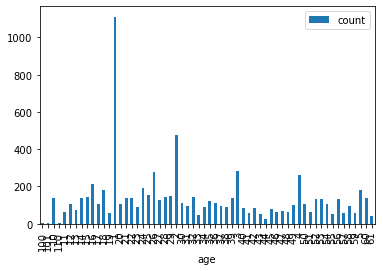

In [232]:
# age data
age_df.plot(x="age", y="count", kind='bar')
plt.show()

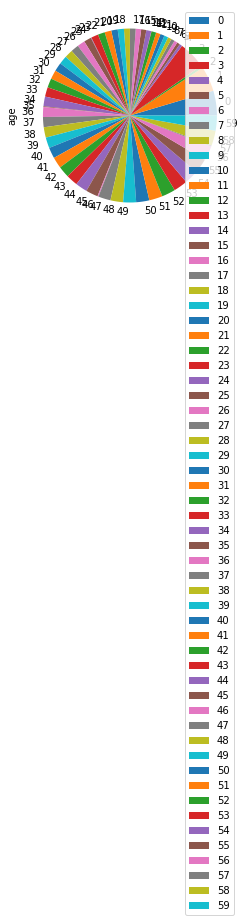

In [233]:
# age data
age_df.plot(x="count", y="age", kind='pie')
plt.show()

Since there are too many features in the category age , we have decided to group them together
The ages range from 0 to 116 years old, to make the grouping easier we oriented them on the stages of life, therefore the following groups have been established:
- Infant = 0-1 year.
- Toddler = 2-4 yrs.
- Child = 5-12 yrs.
- Teen = 13-19 yrs.
- Adult = 20-39 yrs.
- Middle Age Adult = 40-59 yrs.
- Senior Adult = 60+

To do that all we did is create a new dataframe with the sum of counts for each age group:

In [234]:
# create an empty df with the columns
ageGroup_df = pd.DataFrame(columns=['Age Group','Count'])

# now we create a sum for each age group by iterating through the previous df
# for that we first sort the dataframe in ascending order and then get all the rows
age_df = age_df.sort_values(by=['age'])
age_df

age  count
13    1   1112
24    2    475
35    3    284
46    4    260
57    5    180
2    10    140
4    11     63
5    12    106
6    13     75
7    14    137
8    15    143
9    16    212
10   17    103
11   18    181
12   19     58
14   20    103
15   21    136
16   22    139
17   23     92
18   24    191
19   25    156
20   26    279
21   27    126
22   28    145
23   29    150
25   30    109
26   31     97
27   32    141
28   33     46
29   34     87
30   35    121
31   36    112
32   37     94
33   38     91
34   39    136
36   40     85
37   41     56
38   42     84
39   43     52
40   44     27
41   45     77
42   46     61
43   47     70
44   48     64
45   49     99
47   50    105
48   51     62
49   52    133
50   53    133
51   54    106
52   55     52
53   56    132
54   57     60
55   58     96
56   59     59
58   60    137
59   61     43
0   100      2
1   101      1
3   110      2

In [235]:
# now that we have sorted the array lets get the sums together:
infant_total = age_df.iloc[0].sum()
toddler_total = age_df.iloc[1:4].sum()
child_total = age_df.iloc[4:8].sum()
teen_total = age_df.iloc[8:15].sum()
adult_total = age_df.iloc[15:35].sum()
middleAge_total = age_df.iloc[35:55].sum()
senior_total = age_df.iloc[55:].sum()

we will now put them into the new dataFrame

since we cannot create a pie chart with str and int as values we encoded the age Groups:
- 0 => infant
- 1 => toddler
- 2 => child
- 3 => Teen
- 4 => Adult
- 5 => Middle Aged Adult
- 6 => Senior

In [236]:
ageGroup_df = ageGroup_df.append({'Age Group': 0, 'Count': infant_total}, ignore_index=True)
ageGroup_df = ageGroup_df.append({'Age Group': 1, 'Count': toddler_total["count"]}, ignore_index=True)
ageGroup_df = ageGroup_df.append({'Age Group': 2, 'Count': child_total["count"]}, ignore_index=True)
ageGroup_df = ageGroup_df.append({'Age Group': 3, 'Count': teen_total["count"]}, ignore_index=True)
ageGroup_df = ageGroup_df.append({'Age Group': 4, 'Count': adult_total["count"]}, ignore_index=True)
ageGroup_df = ageGroup_df.append({'Age Group': 5, 'Count': middleAge_total["count"]}, ignore_index=True)
ageGroup_df = ageGroup_df.append({'Age Group': 6, 'Count': senior_total["count"]}, ignore_index=True)
ageGroup_df

C:\Users\angel\AppData\Local\Temp\ipykernel_71844\3745475380.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ageGroup_df = ageGroup_df.append({'Age Group': 0, 'Count': infant_total}, ignore_index=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_71844\3745475380.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ageGroup_df = ageGroup_df.append({'Age Group': 1, 'Count': toddler_total["count"]}, ignore_index=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_71844\3745475380.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ageGroup_df = ageGroup_df.append({'Age Group': 2, 'Count': child_total["count"]}, ignore_index=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_71844\3745475380.py:4: FutureWarning: The frame.appen

Age Group Count
0         0  1113
1         1  1019
2         2   489
3         3   909
4         4  2551
5         5  1613
6         6   185

Now lets visualize the distribution of the Age Groups again:


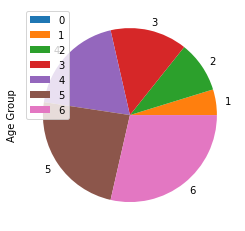

In [237]:
# age group data
ageGroup_df.plot(x="Count", y="Age Group", kind='pie')
plt.show()

# here again the encoding for it to be more readable:
# - 0 => infant
# - 1 => toddler
# - 2 => child
# - 3 => Teen
# - 4 => Adult
# - 5 => Middle Aged Adult
# - 6 => Senior

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


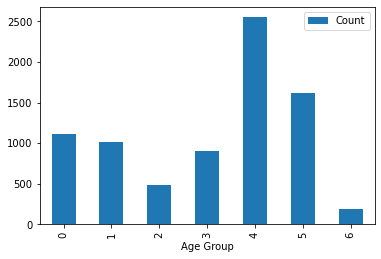

In [238]:
# age group data
ageGroup_df.plot(x="Age Group", y="Count", kind='bar')
plt.show()

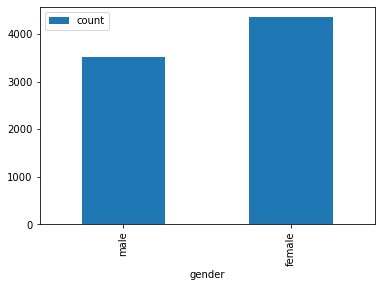

In [239]:
# gender data
gender_df.plot(x="gender", y="count", kind='bar')
plt.show()

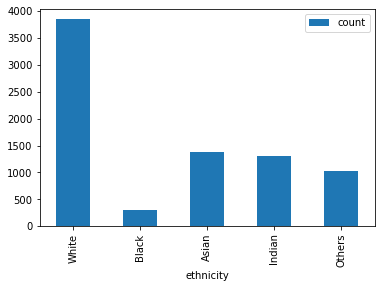

In [240]:
# ethnicity data
ethnicity_df.plot(x="ethnicity", y="count", kind='bar')
plt.show()

### Conclusion:

- One can see that by far the most represented ethnicity in this DataSet is white, meaning the model will not be accurate enough for other ethnicities.
- We have a slight imbalance between female and male
- When looking at the ages we see that there are also occurances of an imbalance depening on the age group we are focusing on

## Task 2 : Visualize some of the images

Before we move on to the Preprocessing step of the Project lets visualize a few images (of different labels) in different ways.

We will visualize data from the different features (2-3 pictures) to show what kind of images are representing them as an overview.
The features we have chosen to focus on for the visualization are:
1. Age Group
2. Ethnicity

Before we do that we create a df of images for easier handling all the images we have:

In [241]:
#  the lists we need for the df
# - age_list=[]
# - gender_list=[]
# - ethnicity_list = []
# - images=[]

images_df = pd.DataFrame(list(zip(image_files, age_list, gender_list, ethnicity_list)), columns=["image", "age", "gender", "ethnicity"])
images_df.head()

image  age  gender  ethnicity
0  100_1_0_20170110183726390.jpg.chip.jpg  100       1          0
1  100_1_2_20170105174847679.jpg.chip.jpg  100       1          2
2  101_1_2_20170105174739309.jpg.chip.jpg  101       1          2
3   10_0_0_20161220222308131.jpg.chip.jpg   10       0          0
4   10_0_0_20170103200329407.jpg.chip.jpg   10       0          0

### Age Group

To repeat these are our Age Groups:
- Infant = 0-1 year.
- Toddler = 2-4 yrs.
- Child = 5-12 yrs.
- Teen = 13-19 yrs.
- Adult = 20-39 yrs.
- Middle Age Adult = 40-59 yrs.
- Senior Adult = 60+

We will choose about 3-4 numbers for each range and visualize one image each.

Ages Chosen for each Age Group:
- Infant = 0, 1
- Toddler = 2, 3, 4
- Child = 5, 9, 12
- Teen = 13, 15 , 19
- Adult = 20, 25, 33, 39
- Middle Age Adult = 40, 45, 53, 59
- Senior Adult = 60, ~70, ~90, ~100

### Ethnicity

We will repeat this procedure with the ethnicity.
These are the ethnicities we have:
- White
- Asian
- Black
- Indian
- Others

Now we will visualize the ages for each ethnicity

Since the steps are always the same we made a simple function:


In [242]:
def visualize_dataset(ethnicity):
    # first create a list of ages we want to display
    age_ranges = [1, 2, 3, 4, 5, 9, 12, 15, 19, 25, 33, 39, 45, 53, 59, 70, 80, 90, 100]

    plt.figure(figsize=(5, 5))

    for age in age_ranges:
        # get first picture where the age matches
        curr = images_df.loc[(images_df['age'] == age) & (images_df['ethnicity'] == ethnicity)]
        isempty = curr.empty
        if isempty == False :
            # lets load the image
            img = load_img(folder+curr.iloc[0]["image"])
            img = np.array(img)
            plt.imshow(img)
            plt.title(f"Age: {age} Ethnicity: {ethnicity}")
            plt.axis('off')
            plt.show()

#### White

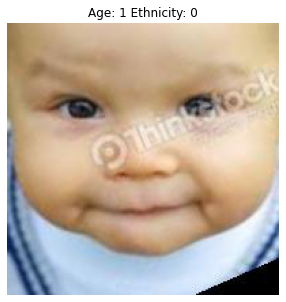

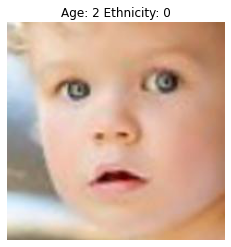

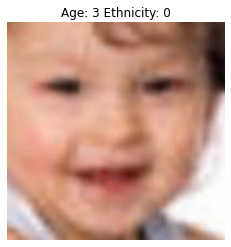

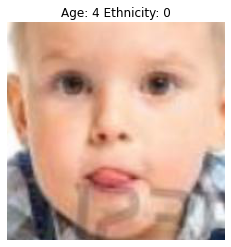

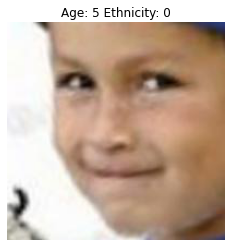

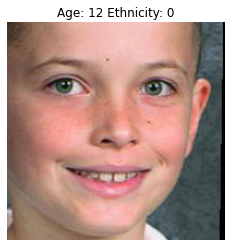

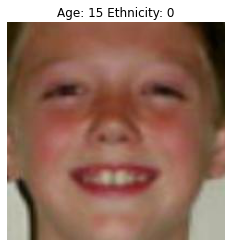

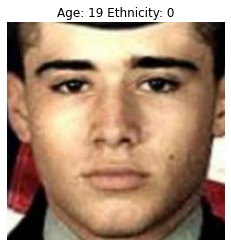

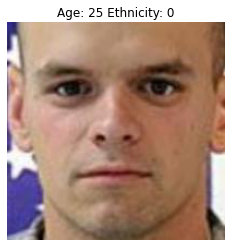

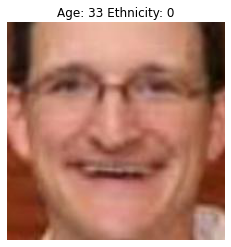

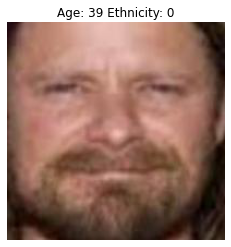

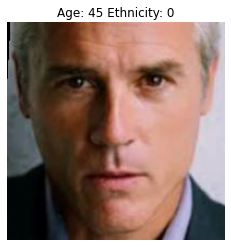

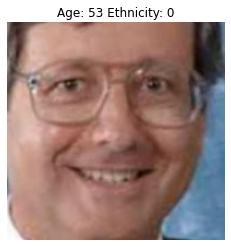

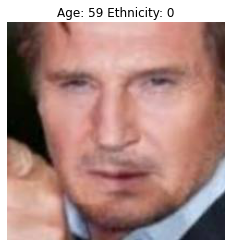

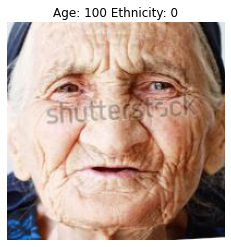

In [243]:
visualize_dataset(0)

#### Asian

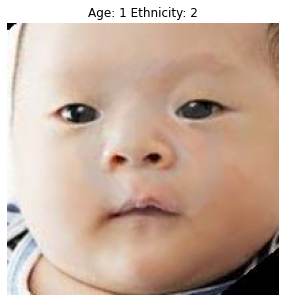

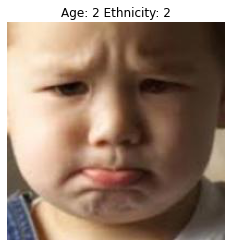

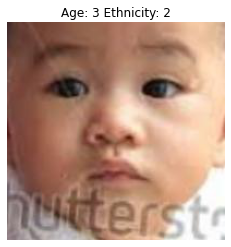

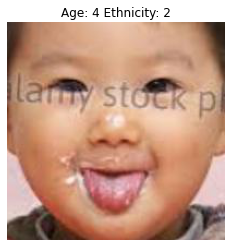

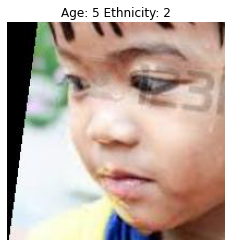

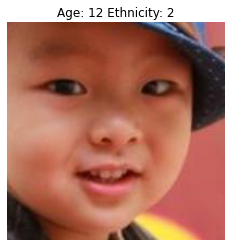

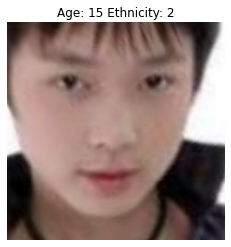

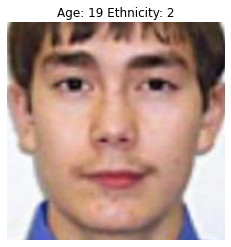

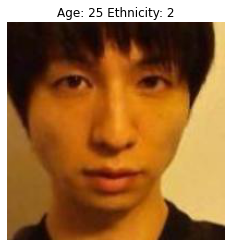

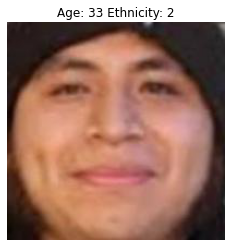

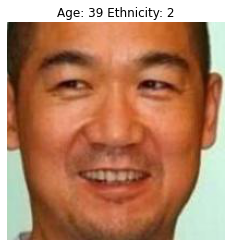

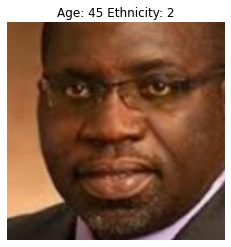

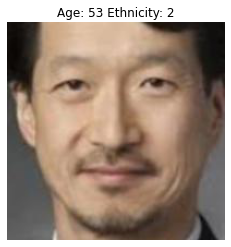

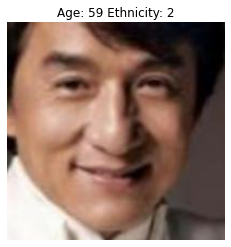

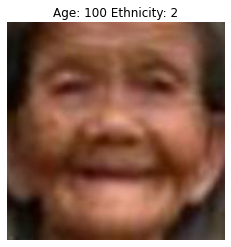

In [215]:
visualize_dataset(2)

#### Black

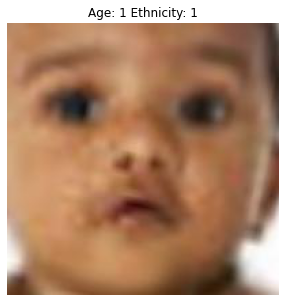

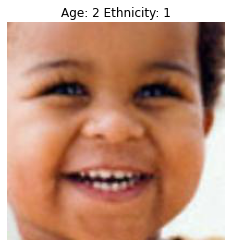

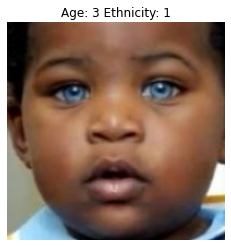

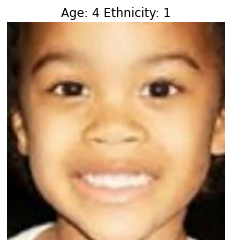

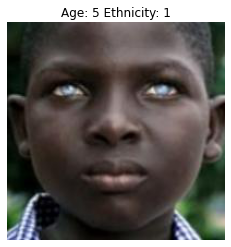

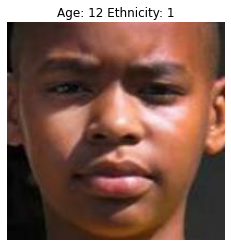

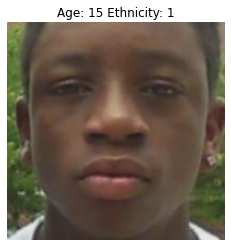

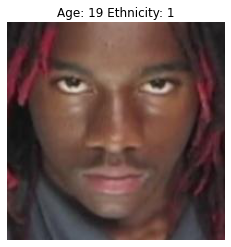

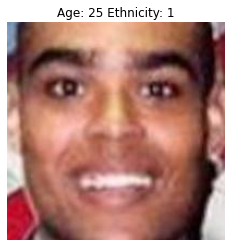

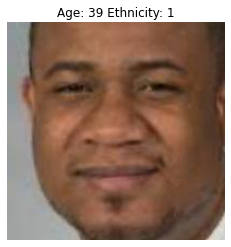

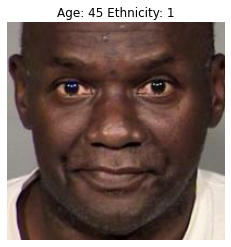

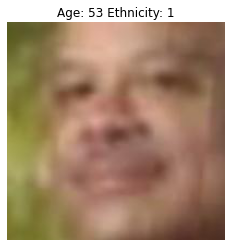

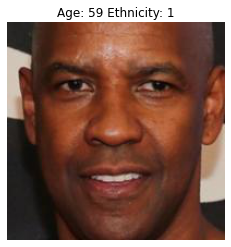

In [216]:
visualize_dataset(1)

#### Indian

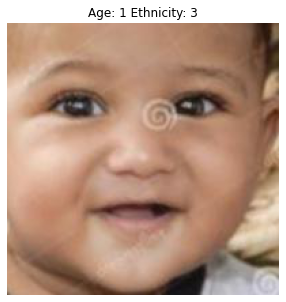

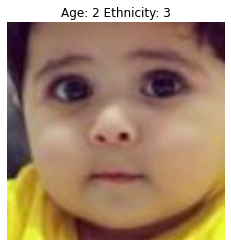

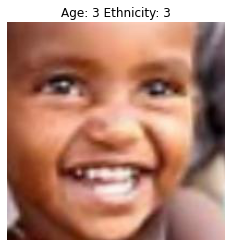

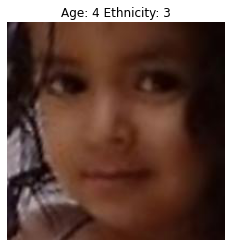

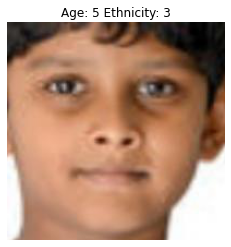

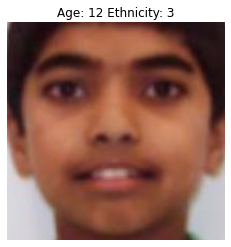

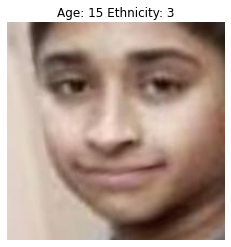

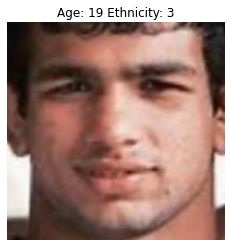

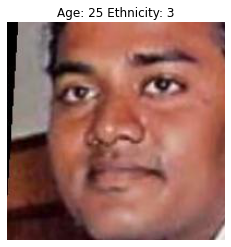

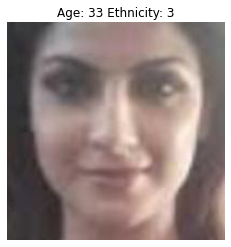

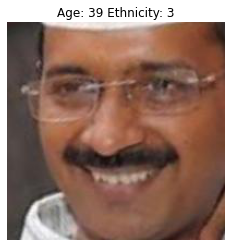

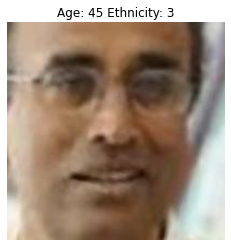

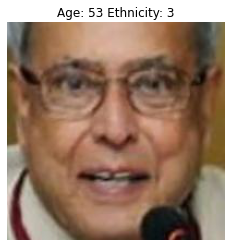

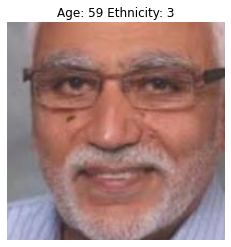

In [217]:
visualize_dataset(3)

#### Others

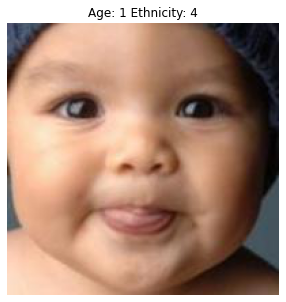

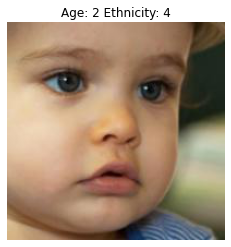

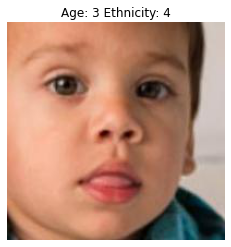

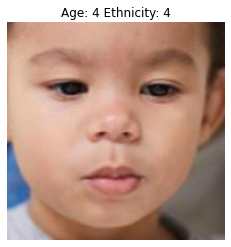

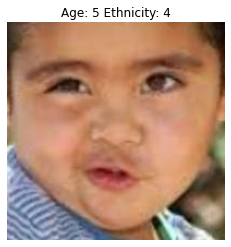

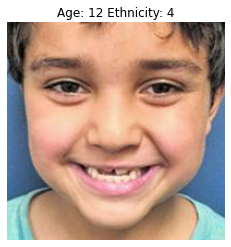

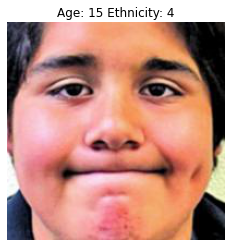

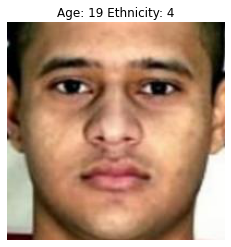

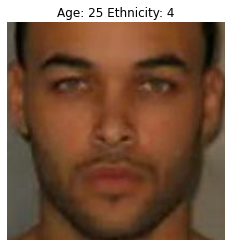

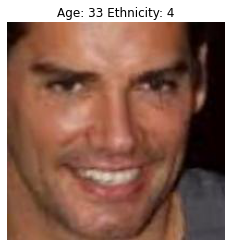

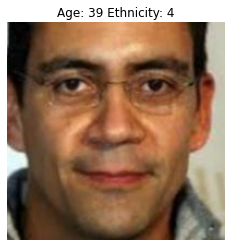

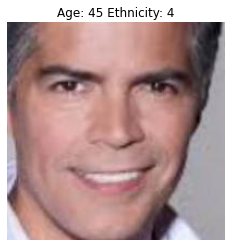

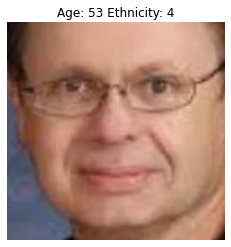

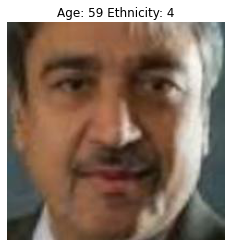

In [218]:
visualize_dataset(4)

In [244]:
print(len(images), type(images))
print(len(age_list))
print(len(gender_list))
print(range(len(age_list)))

7878 <class 'list'>
7878
7878
range(0, 7878)


In [14]:
images_np=np.array(images)
ages_np=np.array(age_list)
genders_np=np.array(gender_list)
ethnicity_np = np.array(ethnicity_list)

print(genders_np)
print(ethnicity_np)

[1 1 1 ... 1 1 1]
[0 2 2 ... 0 0 0]


## Task 3 : Train Test Split

#### Split for Gender Classification
First we will create a model for gender classification by using the gender numpy array as label/y

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_np, genders_np, test_size=0.2, train_size=0.8, random_state=4)

#### Split for Ethnicity Classification
Now we will use ethnicity_np to classify the ethnicity of the images

In [16]:
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(images_np, ethnicity_np, test_size=0.2, train_size=0.8, random_state=4)

## Task 4 : CNN Model

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Gender Classification

best batch size seems to be 64
try out adding resize to 128

In [25]:
# images are already cropped: image size = 200
num_classes = 2

model = keras.Sequential([
# Add the preprocessing layers
    layers.Resizing(128,128),
    layers.Rescaling(1./255),               #rescale
    layers.RandomFlip("horizontal_and_vertical"),   #data augmentation
    layers.RandomRotation(0.2),                     #data augmentation
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),            #prevent overfitting
    layers.Dense(num_classes)
])

In [26]:
# view training and validation accuracy for each training epoch by passing the metrics argument to model.compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [251]:
#train for 5 epochs, batch_size = 32
epochs=5
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test, y_test)
)

Epoch 1/5
197/197 [==============================] - 68s 341ms/step - loss: 0.6452 - accuracy: 0.6160 - val_loss: 0.6111 - val_accuracy: 0.6758
Epoch 2/5
197/197 [==============================] - 96s 490ms/step - loss: 0.5989 - accuracy: 0.6758 - val_loss: 0.5831 - val_accuracy: 0.6815
Epoch 3/5
197/197 [==============================] - 90s 454ms/step - loss: 0.5791 - accuracy: 0.6877 - val_loss: 0.5690 - val_accuracy: 0.7043
Epoch 4/5
197/197 [==============================] - 76s 388ms/step - loss: 0.5690 - accuracy: 0.6955 - val_loss: 0.5696 - val_accuracy: 0.6973
Epoch 5/5
197/197 [==============================] - 79s 402ms/step - loss: 0.5615 - accuracy: 0.7053 - val_loss: 0.5373 - val_accuracy: 0.7176


In [252]:
#train for 10 epochs, batch_size = 64
#new
epochs=10
history2 = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test, y_test)
)

Epoch 1/10
99/99 [==============================] - 69s 700ms/step - loss: 0.5326 - accuracy: 0.7234 - val_loss: 0.5144 - val_accuracy: 0.7430
Epoch 2/10
99/99 [==============================] - 76s 765ms/step - loss: 0.5238 - accuracy: 0.7356 - val_loss: 0.5023 - val_accuracy: 0.7411
Epoch 3/10
99/99 [==============================] - 72s 725ms/step - loss: 0.5136 - accuracy: 0.7439 - val_loss: 0.5198 - val_accuracy: 0.7443
Epoch 4/10
99/99 [==============================] - 84s 853ms/step - loss: 0.5152 - accuracy: 0.7318 - val_loss: 0.4833 - val_accuracy: 0.7646
Epoch 5/10
99/99 [==============================] - 81s 823ms/step - loss: 0.5052 - accuracy: 0.7431 - val_loss: 0.5059 - val_accuracy: 0.7513
Epoch 6/10
99/99 [==============================] - 84s 848ms/step - loss: 0.4984 - accuracy: 0.7479 - val_loss: 0.4848 - val_accuracy: 0.7646
Epoch 7/10
99/99 [==============================] - 77s 778ms/step - loss: 0.4923 - accuracy: 0.7526 - val_loss: 0.4825 - val_accuracy: 0.7544

In [27]:
#train for 30 epochs, batch_size = 64
epochs=30
history3 = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test, y_test)
)

Epoch 1/30
99/99 [==============================] - 83s 828ms/step - loss: 0.6449 - accuracy: 0.6265 - val_loss: 0.5900 - val_accuracy: 0.6897
Epoch 2/30
99/99 [==============================] - 90s 906ms/step - loss: 0.6072 - accuracy: 0.6663 - val_loss: 0.5896 - val_accuracy: 0.6923
Epoch 3/30
99/99 [==============================] - 89s 905ms/step - loss: 0.5863 - accuracy: 0.6896 - val_loss: 0.5818 - val_accuracy: 0.6802
Epoch 4/30
99/99 [==============================] - 89s 903ms/step - loss: 0.5665 - accuracy: 0.6998 - val_loss: 0.5400 - val_accuracy: 0.7240
Epoch 5/30
99/99 [==============================] - 89s 903ms/step - loss: 0.5594 - accuracy: 0.7061 - val_loss: 0.5318 - val_accuracy: 0.7253
Epoch 6/30
99/99 [==============================] - 88s 886ms/step - loss: 0.5463 - accuracy: 0.7220 - val_loss: 0.5258 - val_accuracy: 0.7487
Epoch 7/30
99/99 [==============================] - 88s 886ms/step - loss: 0.5396 - accuracy: 0.7185 - val_loss: 0.5082 - val_accuracy: 0.7570

### Ethnicity Classification

In [19]:
# images are already cropped: image size = 200
num_classes = 5


model_ethnicity = keras.Sequential([
# Add the preprocessing layers
    layers.Resizing(128,128),
    layers.Rescaling(1./255),               #rescale
    layers.RandomFlip("horizontal_and_vertical"),   #data augmentation
    layers.RandomRotation(0.2),                     #data augmentation
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),            #prevent overfitting
    layers.Dense(num_classes)
])

In [20]:
# view training and validation accuracy for each training epoch by passing the metrics argument to model.compile
model_ethnicity.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
#train for 10 epochs, batch_size = 64
epochs=30
history_ethnicity = model_ethnicity.fit(
    x=X_train_ethnicity,
    y=y_train_ethnicity,
    batch_size=64,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test_ethnicity, y_test_ethnicity)
)

Epoch 1/30
99/99 [==============================] - 63s 619ms/step - loss: 1.3653 - accuracy: 0.4819 - val_loss: 1.2836 - val_accuracy: 0.5121
Epoch 2/30
99/99 [==============================] - 67s 682ms/step - loss: 1.3133 - accuracy: 0.4830 - val_loss: 1.2344 - val_accuracy: 0.5152
Epoch 3/30
99/99 [==============================] - 64s 643ms/step - loss: 1.2961 - accuracy: 0.4852 - val_loss: 1.2217 - val_accuracy: 0.5133
Epoch 4/30
99/99 [==============================] - 66s 672ms/step - loss: 1.2737 - accuracy: 0.4879 - val_loss: 1.2271 - val_accuracy: 0.5228
Epoch 5/30
99/99 [==============================] - 64s 650ms/step - loss: 1.2419 - accuracy: 0.5030 - val_loss: 1.2088 - val_accuracy: 0.5419
Epoch 6/30
99/99 [==============================] - 66s 667ms/step - loss: 1.2194 - accuracy: 0.5197 - val_loss: 1.1735 - val_accuracy: 0.5590
Epoch 7/30
99/99 [==============================] - 65s 659ms/step - loss: 1.1668 - accuracy: 0.5454 - val_loss: 1.1785 - val_accuracy: 0.5165

## Evaluate the model

In [28]:
#gender
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3912806212902069
Test accuracy: 0.8007614016532898


In [30]:
print(history3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


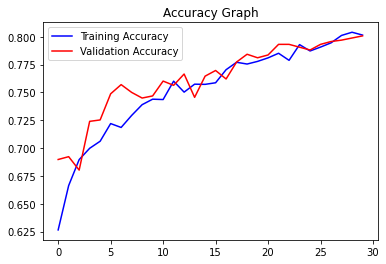

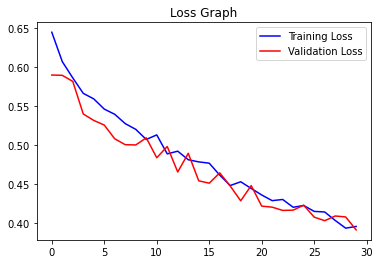

In [31]:
# plot accuracy for gender model
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [23]:
#ethnicity
score_ethnicity = model_ethnicity.evaluate(X_test_ethnicity, y_test_ethnicity, verbose=0)
print('Test loss:', score_ethnicity[0])
print('Test accuracy:', score_ethnicity[1])

Test loss: 0.742211103439331
Test accuracy: 0.7284263968467712


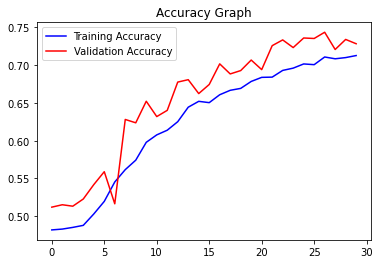

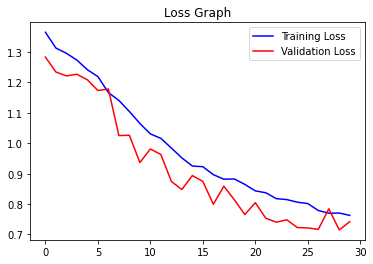

In [24]:
# plot accuracy for gender model
acc_ethnicity = history_ethnicity.history['accuracy']
val_acc_ethnicity = history_ethnicity.history['val_accuracy']
epochs_ethnicity = range(len(acc_ethnicity))

plt.plot(epochs_ethnicity, acc_ethnicity, 'b', label='Training Accuracy')
plt.plot(epochs_ethnicity, val_acc_ethnicity, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss_ethnicity = history_ethnicity.history['loss']
val_loss_ethnicity = history_ethnicity.history['val_loss']

plt.plot(epochs_ethnicity, loss_ethnicity, 'b', label='Training Loss')
plt.plot(epochs_ethnicity, val_loss_ethnicity, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

## Predict output for X_test and X_test_ethnicity

In [32]:
#gender
y_pred = model.predict(
    X_test
)
print(y_pred)

50/50 [==============================] - 5s 89ms/step
[[-0.20367062 -0.06628822]
 [-0.21452649 -0.05739075]
 [ 1.8311963  -2.13549   ]
 ...
 [-0.19588155  0.03912939]
 [-4.838188    2.4111583 ]
 [-0.25018933 -0.6166053 ]]


In [33]:
#ethnicity
y_pred_ethnicity = model_ethnicity.predict(
    X_test_ethnicity
)
print(y_pred_ethnicity)

50/50 [==============================] - 5s 90ms/step
[[ 1.7904859  -1.0320684  -1.8524272   0.98982525  0.9957161 ]
 [ 3.798118   -2.455509   -0.22671226 -0.34633905  0.756588  ]
 [ 3.0106845  -1.363109   -1.3616515  -0.14920397  1.7822168 ]
 ...
 [ 1.5955876  -1.2008781  -2.2646036   1.3493637   0.3892745 ]
 [ 0.04539044  0.39488807 -2.9616492   0.90188533  0.6301959 ]
 [ 2.7167926  -1.2889962  -0.40815002 -1.3874587   1.1642339 ]]


In [34]:
def show_single_image_prediction(image_index):
    print("Original Gender:", y_test[image_index], "    |   Original Ethnicity:", y_test_ethnicity[image_index])
    print("Gender Label:", gender_df.gender[y_test[image_index]], "    |    Ethnicity Label:", ethnicity_df.ethnicity[y_test_ethnicity[image_index]])

    # expand array shape
    img_g = np.expand_dims(X_test[image_index], axis = 0)
    img_e = np.expand_dims(X_test_ethnicity[image_index], axis = 0)

    # gender prediction by model "model"
    pred_gender_prob = model.predict(img_g)
    gender_class = pred_gender_prob.argmax(axis=-1)                 # sequential model returns probability for each class -> argmax for fetching class label
    pred_gender = gender_df.gender[gender_class[0]]                 # use dataframe for displaying the name of the class, gender_class[0] because otherwise                                                                     gender_class is an array - not suitable as index

    # ethnicity prediction by model "model_ethnicity"
    pred_ethnicity_prob = model_ethnicity.predict(img_e)
    ethnicity_class = pred_ethnicity_prob.argmax(axis=1)            # sequential model returns probability for each class -> argmax for fetching class label
    pred_ethnicity = ethnicity_df.ethnicity[ethnicity_class[0]]     # use dataframe for displaying the name of the class
    print("Predicted Gender (probabilities) :", pred_gender_prob, "   |   Predicted Ethnicity (probabilities):", pred_ethnicity_prob)
    print("Predicted Gender:", pred_gender, "   |   Predicted Ethnicity:", pred_ethnicity)
    plt.axis('off')
    plt.imshow(X_test[image_index])

Original Gender: 0     |   Original Ethnicity: 0
Gender Label: male     |    Ethnicity Label: White
1/1 [==============================] - 0s 30ms/step
Predicted Gender (probabilities) : [[-0.04037907 -0.26515788]]    |   Predicted Ethnicity (probabilities): [[ 4.6004376  -2.8610716  -0.62404096 -0.49442622  1.9796612 ]]
Predicted Gender: male    |   Predicted Ethnicity: White


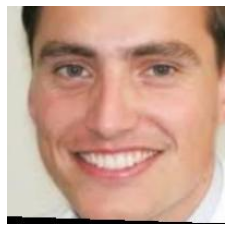

In [35]:
show_single_image_prediction(28)

Original Gender: 1     |   Original Ethnicity: 1
Gender Label: female     |    Ethnicity Label: Black
1/1 [==============================] - 0s 24ms/step
Predicted Gender (probabilities) : [[-1.3871921   0.29606962]]    |   Predicted Ethnicity (probabilities): [[-3.1494458   2.6209962  -5.306687    1.2073466  -0.78746396]]
Predicted Gender: female    |   Predicted Ethnicity: Black


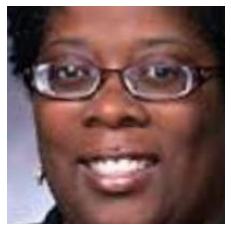

In [36]:
show_single_image_prediction(24)

Original Gender: 1     |   Original Ethnicity: 4
Gender Label: female     |    Ethnicity Label: Others
1/1 [==============================] - 0s 20ms/step
Predicted Gender (probabilities) : [[-4.008025   1.3027658]]    |   Predicted Ethnicity (probabilities): [[ 0.29851672 -0.4787513  -3.9225798   1.5963942   1.715171  ]]
Predicted Gender: female    |   Predicted Ethnicity: Others


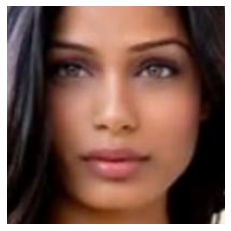

In [37]:
show_single_image_prediction(100)